In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('/content/CW1_COVID_world_data.csv')
print("df =",df.shape)
df.head()

df = (227, 14)


,Country,Population,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Revovered,Active Cases,"Serious, Critical Cases",Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop
0,World,NaN,406944092,638463.0,5810434.0,2654.0,327036011.0,915688.0,74097647.0,89283.0,52207.0,745.4,NaN,NaN
1,USA,3.341253e+08,79052681,NaN,939427.0,NaN,49435538.0,NaN,28677716.0,17454.0,236596.0,2812.0,923990953.0,2765402.0
2,India,1.401828e+09,42536137,NaN,507208.0,NaN,41331158.0,NaN,697771.0,8944.0,30343.0,362.0,747870047.0,533496.0
3,Brazil,2.149902e+08,27125512,NaN,636111.0,NaN,23446849.0,NaN,3042552.0,8318.0,126171.0,2959.0,63776166.0,296647.0
4,France,6.550591e+07,21372278,NaN,134207.0,NaN,16256611.0,389010.0,4981460.0,3622.0,326265.0,2049.0,238632994.0,3642923.0


In [3]:
#Delete first row
df.drop(0,axis=0,inplace=True)
df.head()

,Country,Population,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Revovered,Active Cases,"Serious, Critical Cases",Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop
1,USA,3.341253e+08,79052681,NaN,939427.0,NaN,49435538.0,NaN,28677716.0,17454.0,236596.0,2812.0,923990953.0,2765402.0
2,India,1.401828e+09,42536137,NaN,507208.0,NaN,41331158.0,NaN,697771.0,8944.0,30343.0,362.0,747870047.0,533496.0
3,Brazil,2.149902e+08,27125512,NaN,636111.0,NaN,23446849.0,NaN,3042552.0,8318.0,126171.0,2959.0,63776166.0,296647.0
4,France,6.550591e+07,21372278,NaN,134207.0,NaN,16256611.0,389010.0,4981460.0,3622.0,326265.0,2049.0,238632994.0,3642923.0
5,UK,6.845974e+07,18162199,NaN,159158.0,NaN,15681335.0,NaN,2321706.0,430.0,265298.0,2325.0,463984342.0,6777478.0


In [4]:
#Delete last row
df.drop(226,axis=0,inplace=True)
df.tail()

,Country,Population,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Revovered,Active Cases,"Serious, Critical Cases",Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop
221,MS Zaandam,NaN,9,NaN,2.0,NaN,7.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
222,Vanuatu,318679.0,7,NaN,1.0,NaN,6.0,NaN,0.0,NaN,22.0,3.0,23000.0,72173.0
223,Marshall Islands,59833.0,7,NaN,NaN,NaN,7.0,NaN,0.0,NaN,117.0,NaN,NaN,NaN
224,Saint Helena,6106.0,2,NaN,NaN,NaN,2.0,NaN,0.0,NaN,328.0,NaN,NaN,NaN
225,Micronesia,116962.0,1,NaN,NaN,NaN,1.0,NaN,0.0,NaN,9.0,NaN,NaN,NaN


In [5]:
df.head(226)

,Country,Population,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Revovered,Active Cases,"Serious, Critical Cases",Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop
1,USA,3.341253e+08,79052681,NaN,939427.0,NaN,49435538.0,NaN,28677716.0,17454.0,236596.0,2812.0,923990953.0,2765402.0
2,India,1.401828e+09,42536137,NaN,507208.0,NaN,41331158.0,NaN,697771.0,8944.0,30343.0,362.0,747870047.0,533496.0
3,Brazil,2.149902e+08,27125512,NaN,636111.0,NaN,23446849.0,NaN,3042552.0,8318.0,126171.0,2959.0,63776166.0,296647.0
4,France,6.550591e+07,21372278,NaN,134207.0,NaN,16256611.0,389010.0,4981460.0,3622.0,326265.0,2049.0,238632994.0,3642923.0
5,UK,6.845974e+07,18162199,NaN,159158.0,NaN,15681335.0,NaN,2321706.0,430.0,265298.0,2325.0,463984342.0,6777478.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,MS Zaandam,NaN,9,NaN,2.0,NaN,7.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
222,Vanuatu,3.186790e+05,7,NaN,1.0,NaN,6.0,NaN,0.0,NaN,22.0,3.0,23000.0,72173.0
223,Marshall Islands,5.983300e+04,7,NaN,NaN,NaN,7.0,NaN,0.0,NaN,117.0,NaN,NaN,NaN
224,Saint Helena,6.106000e+03,2,NaN,NaN,NaN,2.0,NaN,0.0,NaN,328.0,NaN,NaN,NaN


In [6]:
#we can find the total count against each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225 entries, 1 to 225
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Population               223 non-null    float64
 2   Total Cases              225 non-null    int64  
 3   New Cases                38 non-null     float64
 4   Total Deaths             216 non-null    float64
 5   New Deaths               28 non-null     float64
 6   Total Recovered          217 non-null    float64
 7   New Revovered            35 non-null     float64
 8   Active Cases             217 non-null    float64
 9   Serious, Critical Cases  164 non-null    float64
 10  Tot Cases/ 1M pop        223 non-null    float64
 11  Deaths/ 1M pop           214 non-null    float64
 12  Total Tests              209 non-null    float64
 13  Tests/ 1M pop            209 non-null    float64
dtypes: float64(12), int64(1), 

In [7]:
#finding out NANs in the table in order to treat them for better results
df.isna().sum()

Country                      0
Population                   2
Total Cases                  0
New Cases                  187
Total Deaths                 9
New Deaths                 197
Total Recovered              8
New Revovered              190
Active Cases                 8
Serious, Critical Cases     61
Tot Cases/ 1M pop            2
Deaths/ 1M pop              11
Total Tests                 16
Tests/ 1M pop               16
dtype: int64

In [8]:
#Alternate to droping row/coloumn. We deleted specific cells with NANs. Names identifies using step 4
df.dropna(subset=['Population', 'New Cases', 'Total Deaths', 'New Deaths', 'Total Recovered', 'New Revovered', 'Active Cases', 'Serious, Critical Cases', 'Deaths/ 1M pop', 'Total Tests', 'Tests/ 1M pop'],axis=0,inplace=True)

In [9]:
#Verifying the status after deleting NANs
df.isna().sum()

Country                    0
Population                 0
Total Cases                0
New Cases                  0
Total Deaths               0
New Deaths                 0
Total Recovered            0
New Revovered              0
Active Cases               0
Serious, Critical Cases    0
Tot Cases/ 1M pop          0
Deaths/ 1M pop             0
Total Tests                0
Tests/ 1M pop              0
dtype: int64

In [10]:
#to check if the data is in correct format
df.dtypes

Country                     object
Population                 float64
Total Cases                  int64
New Cases                  float64
Total Deaths               float64
New Deaths                 float64
Total Recovered            float64
New Revovered              float64
Active Cases               float64
Serious, Critical Cases    float64
Tot Cases/ 1M pop          float64
Deaths/ 1M pop             float64
Total Tests                float64
Tests/ 1M pop              float64
dtype: object

In [11]:
#Human Data should not be treated in floast dataset
df['Population'] = df['Population'].astype('int64')
df['New Cases'] = df['New Cases'].astype('int64')
df['Total Deaths'] = df['Total Deaths'].astype('int64')
df['New Deaths'] = df['New Deaths'].astype('int64')
df['Total Recovered'] = df['Total Recovered'].astype('int64')
df['New Revovered'] = df['New Revovered'].astype('int64')
df['Active Cases'] = df['Active Cases'].astype('int64')
df['Serious, Critical Cases'] = df['Serious, Critical Cases'].astype('int64')
df['Tot Cases/ 1M pop'] = df['Tot Cases/ 1M pop'].astype('int64')
df['Deaths/ 1M pop'] = df['Deaths/ 1M pop'].astype('int64')
df['Total Tests'] = df['Total Tests'].astype('int64')
df['Tests/ 1M pop'] = df['Tests/ 1M pop'].astype('int64')

In [12]:
df.dtypes

Country                    object
Population                  int64
Total Cases                 int64
New Cases                   int64
Total Deaths                int64
New Deaths                  int64
Total Recovered             int64
New Revovered               int64
Active Cases                int64
Serious, Critical Cases     int64
Tot Cases/ 1M pop           int64
Deaths/ 1M pop              int64
Total Tests                 int64
Tests/ 1M pop               int64
dtype: object

In [13]:
# To Predict Outliers, we requested statistical summary of all the quantitative variables. But the result is not understandable
df.describe()

,Population,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Revovered,Active Cases,"Serious, Critical Cases",Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop
count,2.100000e+01,2.100000e+01,21.000000,21.000000,21.000000,2.100000e+01,21.000000,2.100000e+01,21.000000,21.000000,21.000000,2.100000e+01,2.100000e+01
mean,5.108302e+07,2.433056e+06,27666.142857,50761.238095,119.809524,2.014503e+06,18416.809524,3.677917e+05,699.571429,117139.952381,1514.761905,3.308002e+07,1.718309e+06
std,6.215269e+07,3.025962e+06,47015.300700,94343.601239,243.918761,2.455721e+06,27941.840533,5.502572e+05,1118.956236,115471.168843,1369.332133,6.184715e+07,3.602851e+06
min,5.950870e+05,3.632900e+04,15.000000,436.000000,1.000000,3.268400e+04,3.000000,3.209000e+03,13.000000,2651.000000,32.000000,2.226120e+05,2.166800e+04
25%,9.089073e+06,4.102100e+05,2498.000000,7012.000000,5.000000,2.973740e+05,829.000000,6.656500e+04,131.000000,29131.000000,185.000000,2.955849e+06,2.464370e+05
50%,1.913793e+07,1.477573e+06,11559.000000,18064.000000,24.000000,1.365518e+06,8955.000000,1.113900e+05,246.000000,67179.000000,1577.000000,1.454913e+07,3.740830e+05
75%,7.008179e+07,3.405839e+06,32712.000000,37712.000000,72.000000,2.752551e+06,19346.000000,4.761340e+05,542.000000,220914.000000,2376.000000,2.765908e+07,1.801621e+06
max,2.277871e+08,1.373179e+07,203949.000000,338813.000000,927.000000,1.102163e+07,112236.000000,2.371348e+06,4798.000000,313106.000000,4403.000000,2.631000e+08,1.648888e+07


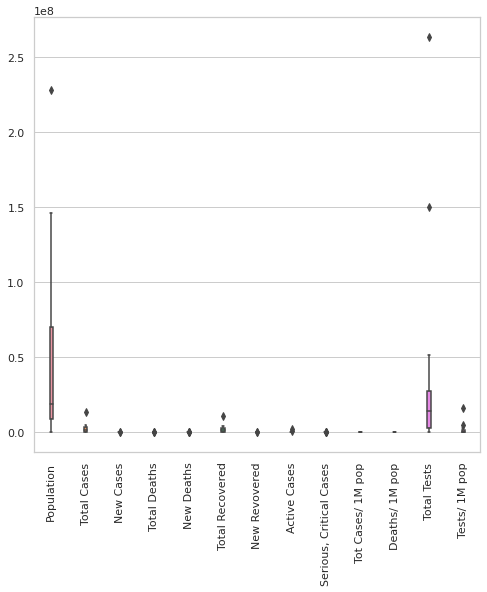

In [14]:
#Multiple Boxplot on one figure
#set Style

sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(8,8))

g = sns.boxplot(data=df, width=0.1)
plt.xticks(rotation='vertical')


plt.show()

In [15]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

#Here we will get IQR for each column.

Population                 60992714.0
Total Cases                 2995629.0
New Cases                     30214.0
Total Deaths                  30700.0
New Deaths                       67.0
Total Recovered             2455177.0
New Revovered                 18517.0
Active Cases                 409569.0
Serious, Critical Cases         411.0
Tot Cases/ 1M pop            191783.0
Deaths/ 1M pop                 2191.0
Total Tests                24703236.0
Tests/ 1M pop               1555184.0
dtype: float64


In [16]:
#The below code will remove the outliers from the dataset.

df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  This is separate from the ipykernel package so we can avoid doing imports until


(13, 14)

In [17]:
#Sum of count of NULL values/outliers in each column of the dataset:
df.isnull().sum()

Country                    0
Population                 0
Total Cases                0
New Cases                  0
Total Deaths               0
New Deaths                 0
Total Recovered            0
New Revovered              0
Active Cases               0
Serious, Critical Cases    0
Tot Cases/ 1M pop          0
Deaths/ 1M pop             0
Total Tests                0
Tests/ 1M pop              0
dtype: int64

In [18]:
#Normalization

import numpy as np
from sklearn import preprocessing
cols_to_norm = ['Population','Total Cases','New Cases','Total Deaths','New Deaths','Total Recovered','New Revovered','Active Cases','Serious, Critical Cases','Tot Cases/ 1M pop','Deaths/ 1M pop','Total Tests','Tests/ 1M pop']
df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
print(df[cols_to_norm])

     Population  Total Cases  New Cases  Total Deaths  New Deaths  \
6      0.640164     1.000000   1.000000      1.000000    0.778618   
16     0.574477     0.378953   0.167927      0.919442    1.000000   
18     0.188017     0.323219   0.202095      0.301341    0.253780   
19     0.551332     0.265048   0.490757      0.057572    0.187905   
21     0.490033     0.262445   0.018501      0.160821    0.076674   
22     0.048750     0.246031   0.096114      0.086079    0.070194   
24     0.044658     0.242907   0.111056      0.110161    0.025918   
30     0.305850     0.184352   0.074666      0.064880    0.023758   
37     0.037387     0.159268   0.160331      0.041081    0.022678   
42     0.039728     0.121183   0.056607      0.123897    0.097192   
43     1.000000     0.105235   0.017079      0.086445    0.041037   
46     0.081617     0.091223   0.012176      0.038410    0.016199   
47     0.223358     0.087836   0.264355      0.019434    0.051836   
49     0.021430     0.085483   0.0

In [23]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
X = df.iloc[:, 1:13].values
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)
# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01
mean,-7.930164e-17,5.815454e-17,1.903239e-16,2.061843e-16,4.758099e-17,5.815454e-17,-5.286776e-17,-1.427430e-16,-1.374562e-16,5.286776e-17,2.114711e-17,2.643388e-17
std,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00,1.024695e+00
min,-8.323814e-01,-8.116145e-01,-6.026547e-01,-5.465980e-01,-4.991151e-01,-8.269508e-01,-6.752791e-01,-6.789299e-01,-6.287345e-01,-1.015979e+00,-1.109577e+00,-5.443876e-01
25%,-6.923432e-01,-6.850055e-01,-5.485379e-01,-4.751740e-01,-4.823112e-01,-7.165040e-01,-6.449876e-01,-5.609477e-01,-5.206748e-01,-7.809944e-01,-9.950840e-01,-4.991028e-01
50%,-5.266704e-01,-3.235596e-01,-3.510540e-01,-3.551348e-01,-4.024928e-01,-2.708011e-01,-3.469875e-01,-4.774741e-01,-4.153625e-01,-4.433552e-01,4.657385e-02,-3.070231e-01
75%,3.132276e-01,3.294178e-01,1.099741e-01,-1.417318e-01,-2.008463e-01,3.079641e-01,3.407567e-02,2.017563e-01,-1.442976e-01,9.208944e-01,6.444795e-01,-8.981500e-02
max,2.913274e+00,3.826143e+00,3.842072e+00,3.128619e+00,3.390982e+00,3.758391e+00,3.440577e+00,3.731045e+00,3.753176e+00,1.739009e+00,2.161319e+00,3.811014e+00


In [24]:
#apply for PCA.

pca = PCA()
df_pca = pd.DataFrame(df)
df_pca

,Country,Population,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Revovered,Active Cases,"Serious, Critical Cases",Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop
6,Russia,0.640164,1.000000,1.000000,1.000000,0.778618,1.000000,1.000000,1.000000,0.477952,0.294342,0.523450,1.000000,0.108091
16,Mexico,0.574477,0.378953,0.167927,0.919442,1.000000,0.400939,0.292989,0.199703,1.000000,0.119856,0.536262,0.054499,0.005423
18,Ukraine,0.188017,0.323219,0.202095,0.301341,0.253780,0.338353,0.185748,0.256122,0.034274,0.323377,0.533516,0.071129,0.025213
19,Japan,0.551332,0.265048,0.490757,0.057572,0.187905,0.247509,0.692123,0.376079,0.277325,0.085294,0.028826,0.135871,0.016026
21,Philippines,0.490033,0.262445,0.018501,0.160821,0.076674,0.314129,0.050333,0.037134,0.062487,0.095946,0.104782,0.104370,0.013691
22,Belgium,0.048750,0.246031,0.096114,0.086079,0.070194,0.202417,0.158946,0.471270,0.087147,0.931455,0.572180,0.116999,0.159878
24,Czechia,0.044658,0.242907,0.111056,0.110161,0.025918,0.268849,0.003760,0.141495,0.048694,1.000000,0.795928,0.195258,0.290144
30,Thailand,0.305850,0.184352,0.074666,0.064880,0.023758,0.217914,0.079763,0.045682,0.110554,0.109175,0.065660,0.064852,0.013649
37,Austria,0.037387,0.159268,0.160331,0.041081,0.022678,0.166566,0.308465,0.142294,0.036573,0.777353,0.353466,0.569262,1.000000
42,Hungary,0.039728,0.121183,0.056607,0.123897,0.097192,0.126603,0.119109,0.095645,0.040961,0.559279,1.000000,0.038828,0.064516


In [26]:
# inertia on the fitted data
kmeans.inertia_

0.9777218287590166

In [27]:
#Inertia 

wcss=[]
# fitting multiple k-means algorithms
for i in range(2, 11):
 kmeans = KMeans(n_clusters=i, init='k-means++').fit(X)
 wcss.append(kmeans.inertia_)

In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

([<matplotlib.axis.XTick at 0x7fb1af435e50>,
 <a list of 6 Text major ticklabel objects>)

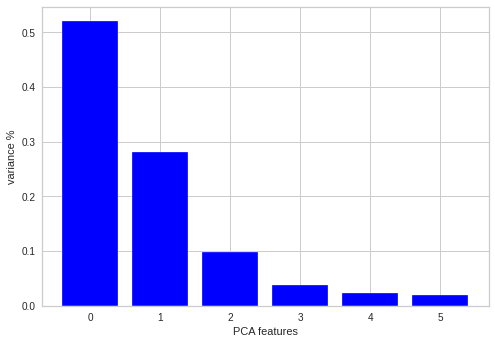

In [30]:
#Dimensionality Reduction
#Creating a PCA instance

pca = PCA(n_components=6)
principalComponents = pca.fit_transform(X)
# plot with the explained variances
features = range(6)
plt.bar(features, pca.explained_variance_ratio_, color='Blue')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

Figure above shows that the first three components reflecting the majority of the variance in our data.

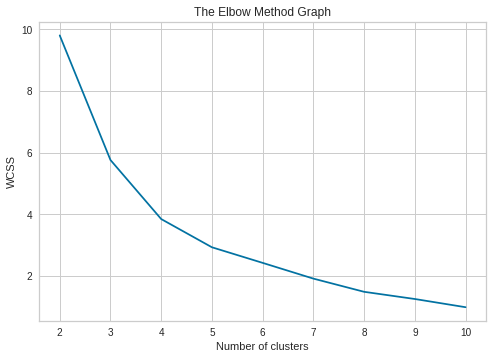

In [31]:
# Elbow Method to fit Kmeans Algorithms 
plt.plot(range(2,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('Elbow_method', dpi=1080, format='png')
plt.show()

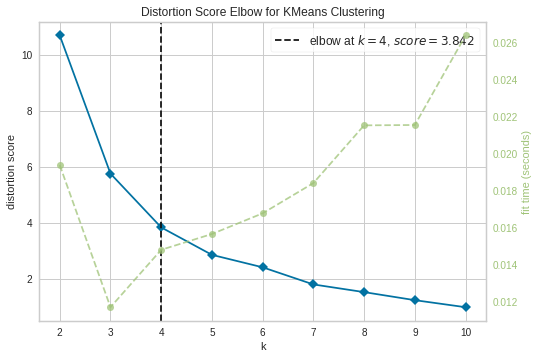

<Figure size 576x396 with 0 Axes>

In [32]:
#Elbow method is more effective way with Yellowbrick Visualiser
visualizer = KElbowVisualizer(kmeans, k=(2,11))
visualizer.fit(X)
visualizer.show()
visualizer.show(outpath="KElbowVisualizer.png")

In [33]:
#Setting a cluster value equal to 5, we can further calculate the pattern
kmeans = KMeans(n_clusters=5, init ='k-means++', max_iter=300, n_init=10, 
random_state=0 )
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)


[1 4 2 3 0 2 2 0 2 2 3 0 0 2 2 2 0 0 0 2 0]


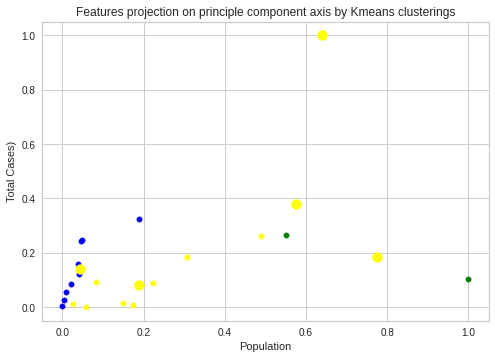

In [34]:
# Cluster Visualisation - Kmeans
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=30, c='yellow', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=30, c='black', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=30, c='Blue', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=30, c='green', label ='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=30, c='red', label ='Cluster 5')

# Centroid Plotting
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', 
label = 'Centroids')
plt.title('Features projection on principle component axis by Kmeans clusterings')
plt.xlabel('Population')
plt.ylabel('Total Cases)')
plt.savefig('Covid_Cases.png', dpi=1080, format='png')
plt.show()

In [35]:
#counting of custer's point
frame = pd.DataFrame(X)
frame['Cluster'] = y_kmeans
frame['Cluster'].value_counts()
print(frame['Cluster'].value_counts())

2    9
0    8
3    2
1    1
4    1
Name: Cluster, dtype: int64


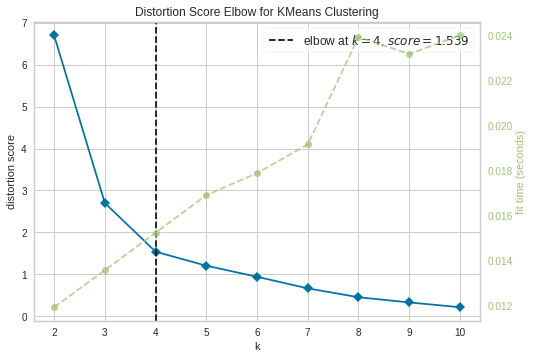

In [96]:
# save components to a DataFrame

PCA_components = pd.DataFrame(principalComponents)
wcss = []
for i in range(2,11):
 model = KMeans(n_clusters = i, init = "k-means++")
 model.fit(PCA_components.iloc[:,:2])
 wcss.append(model.inertia_)

# Elbow method with Yellowbrick Visualiser (2)

visualizer = KElbowVisualizer(model, k=(2,11))
visualizer.fit(PCA_components.iloc[:,:2])
visualizer.show(outpath="PCA.png")
visualizer.show()

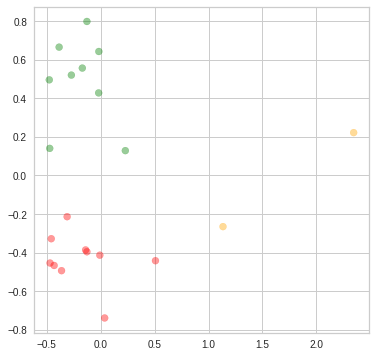

In [97]:
# clustering using KMeans
model = KMeans(n_clusters = 3, init = "k-means++")
label = model.fit_predict(PCA_components.iloc[:,:2])
centers = np.array(model.cluster_centers_)
plt.figure(figsize=(6,6))
uniq = np.unique(label)

#Using plots to show the results:
colors = ['red', 'green', 'orange']

# assign a color to each features (Features used as target)
features_colors = [ colors[label[i]] for i in 
range(len(PCA_components.iloc[:,:2])) ]
T=PCA_components.iloc[:,:2] 

# plot the PCA cluster components
plt.scatter(T[0], T[1],
 c=features_colors, marker='o',
 alpha=0.4
 )

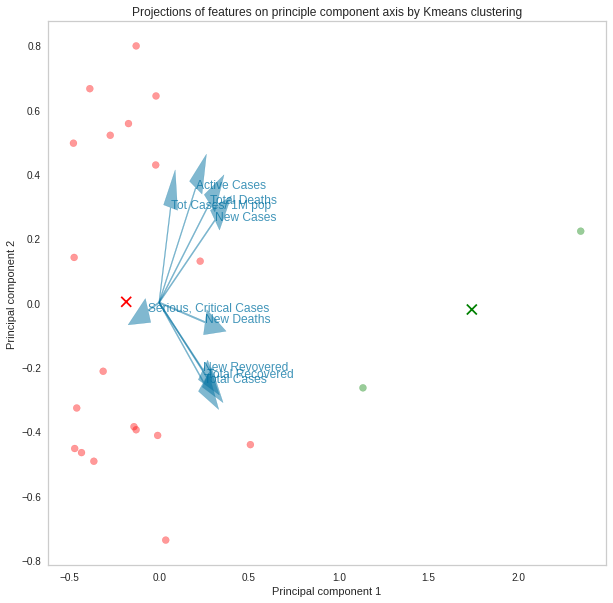

In [100]:
model = KMeans(n_clusters = 2, init = "k-means++")
label = model.fit_predict(principalComponents[:,0:6])
centers = np.array(model.cluster_centers_)
uniq = np.unique(label)

PCA_components = pd.DataFrame(principalComponents)
colors = ['red', 'green']

# assigning color 

features_colors = [ colors[label[i]] for i in range(len(PCA_components.iloc[:,:6])) ]
T=PCA_components.iloc[:,0:6]
plt.figure(figsize=(10,10))
plt.scatter(T[0], T[1],
            c=features_colors, marker='o',
            alpha=0.4)
plt.scatter(centers[:, 0], centers[:, 1],
            marker='x', s=100,
            linewidths=3, c=colors)
xvector =  pca.components_[0] * max(T[1])
yvector =  pca.components_[2] * max(T[1])

for i in range(2,11):
     # plot arrows
    plt.arrow(0, 0, xvector[i], yvector[i],
                color='b', width=0.005,
                head_width=0.08, alpha=0.5
            )
    # plot name of features
    plt.text(xvector[i], yvector[i], list(columns)[i], color='b', alpha=0.75)
plt.grid()
plt.title('Projections of features on principle component axis by Kmeans clustering')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.show()

In [72]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

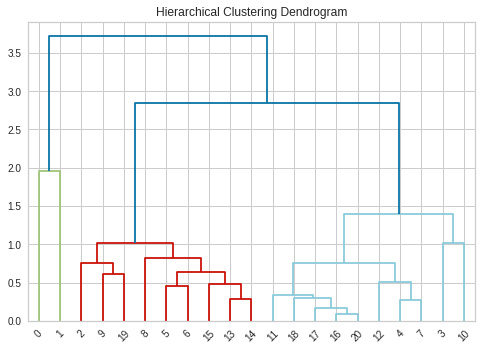

In [80]:
plt.figure()
plt.title("Hierarchical Clustering Dendrogram")
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.savefig('Hierarchical_Clustering_Dendrogram.png', dpi=1080, format='png')


In [74]:
#Using AgglomerativeClustering class of the sklearn.cluster library to group the clusters

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)
print(cluster.fit_predict(X))

[3 4 0 2 1 0 0 1 0 0 2 1 1 0 0 0 1 1 1 0 1]
